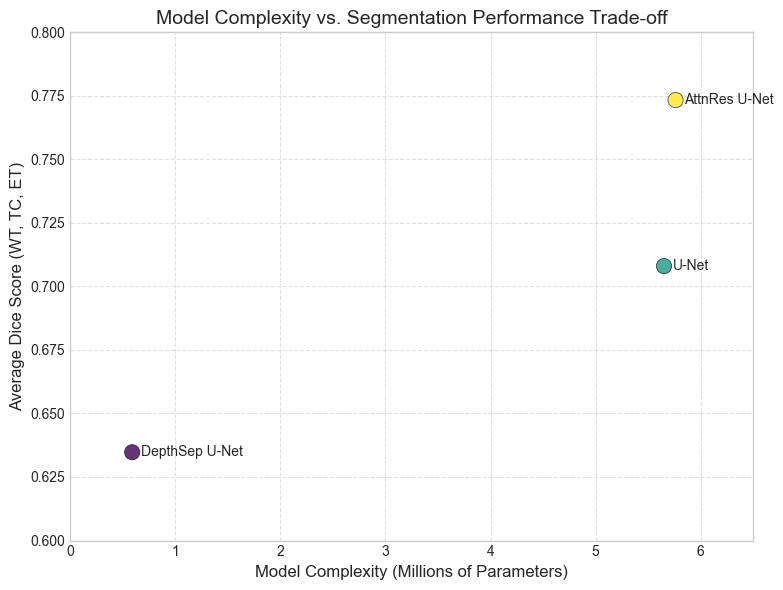

Calculated Average Dice Scores:
- DepthSep U-Net: 0.6347
- U-Net: 0.7080
- AttnRes U-Net: 0.7733


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data from Table 1 ---
# Model names
models = ['DepthSep U-Net', 'U-Net', 'AttnRes U-Net']

# Model Complexity (Millions of Parameters)
params = np.array([0.59, 5.65, 5.76])

# Dice Scores for Whole Tumor (WT), Tumor Core (TC), Enhancing Tumor (ET)
dice_scores = {
    'DepthSep U-Net': [0.8006, 0.5945, 0.5091],
    'U-Net':          [0.7796, 0.6986, 0.6458],
    'AttnRes U-Net':  [0.8705, 0.7595, 0.6900]
}

# Calculate Average Dice Score (WT, TC, ET) for each model
avg_dice = np.array([np.mean(dice_scores[model]) for model in models])

# --- Plotting ---
# Use a clean and visually appealing style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(8, 6)) # Adjusted figure size slightly

# Create the scatter plot
# Use color and size to potentially differentiate points, although labels are primary
scatter = ax.scatter(params, avg_dice, s=120, c=avg_dice, cmap='viridis', alpha=0.8, edgecolors='k', linewidth=0.5)

# Add labels next to each point for clarity
for i, model_name in enumerate(models):
    # Adjust text position slightly for better readability
    ax.text(params[i] + 0.08, avg_dice[i], model_name, fontsize=10, verticalalignment='center')

# Set axis labels with clear descriptions
ax.set_xlabel('Model Complexity (Millions of Parameters)', fontsize=12)
ax.set_ylabel('Average Dice Score (WT, TC, ET)', fontsize=12)

# Set the title of the plot
ax.set_title('Model Complexity vs. Segmentation Performance Trade-off', fontsize=14)

# Set appropriate axis limits to focus on the data range
ax.set_xlim(0, 6.5)
ax.set_ylim(0.60, 0.80) # Adjusted y-limit slightly based on data

# Add grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Optional: Add a color bar to show the mapping of color to Dice score
# cbar = plt.colorbar(scatter)
# cbar.set_label('Average Dice Score', fontsize=10)

# Ensure tight layout to prevent labels from overlapping axis
plt.tight_layout()

# --- Output ---
# Save the figure to a file (e.g., PNG) with high resolution
plt.savefig('complexity_performance_plot.png', dpi=300)

# Display the plot
plt.show()

# Print calculated average dice scores for verification
print("Calculated Average Dice Scores:")
for i, model in enumerate(models):
    print(f"- {model}: {avg_dice[i]:.4f}")
